In [18]:
import pandas as pd
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)
#можно посмотреть струтктуруPPPP и пример записей. Ничего большоее содержвательного определить нельзя
#duplicate не помогате опредлить шумы в данных

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [19]:
from ydata_profiling import ProfileReport
print(df_train.sample(30))
print(df_test.head(5))
print(df_test.tail(5))
print(df_train.isnull().sum())
if not df_train[df_train.duplicated(keep=False)].empty:
    print("Дубликаты есть")
else:
    print("Дубликатов нет")
profile = ProfileReport(df_train, title="Dashboard")
display(profile)
#Задание3
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)
df_train['mileage'] = df_train['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_train['engine'] = df_train['engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df_train['max_power'] = df_train['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test['mileage'] = df_test['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test['engine'] = df_test['engine'].str.extract(r'(\d+\.?\d*)').astype(float)
df_test['max_power'] = df_test['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)
#КонецЗадания3
df_train.fillna(df_train.select_dtypes(include='number').median(), inplace=True)
df_test.fillna(df_train.select_dtypes(include='number').median(), inplace=True)
if (df_train.isnull().sum().sum() +df_test.isnull().sum().sum()) ==0:
    print("Теперь нет пропусков")
else:
    print("Есть пропуски")

                                        name  year  selling_price  km_driven  \
2725         Maruti Swift Dzire VDI Optional  2017         589000      41232   
3711                   Volvo V40 D3 R-Design  2018        2475000       2000   
3258          Mahindra Bolero Power Plus SLE  2017         735000      70000   
2850                  Maruti Ertiga BSIV VXI  2017         765000      40000   
3621                           Lexus ES 300h  2019        5150000      20000   
1845               Honda Amaze V Petrol BSIV  2018         600000      20000   
4264  Toyota Innova 2.5 VX (Diesel) 7 Seater  2015        1050000      70000   
6789     Hyundai Verna VTVT 1.6 AT SX Option  2017         990000      20000   
6278                  Maruti Swift Dzire ZDI  2013         409999      80235   
1170                       Maruti Ertiga ZDI  2012         450000      98000   
1292         Maruti Swift Dzire LDI Optional  2015         459999      80000   
2529        Chevrolet Enjoy TCDi LS 8 Se

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 262.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Теперь нет пропусков


In [21]:
dtry=df_train.drop('selling_price',axis=1)
dtey=df_train.drop('selling_price',axis=1)
if dtry.duplicated(keep=False).sum()!=0:
    print(f"Количество дубликатов:{dtry.duplicated(keep=False).sum()}")
    print(dtry[dtry.duplicated(keep=False)])
    print(df_train.drop_duplicates(keep='first',inplace=True))
    print(df_train.reset_index(drop=True))
else:
    print("Нет дубликатов по признкам")

Количество дубликатов:338
                                           name  year  km_driven    fuel  \
22                      Maruti Baleno Delta 1.2  2016      45000  Petrol   
26                  Maruti Omni E MPI STD BS IV  2018      25000  Petrol   
27              Maruti Vitara Brezza LDi Option  2017      70000  Diesel   
72    Ford EcoSport 1.5 TDCi Titanium Plus BSIV  2015      90000  Diesel   
93                             Maruti Swift VXI  2019      10000  Petrol   
...                                         ...   ...        ...     ...   
6906                           Maruti Swift VDI  2012      90000  Diesel   
6946                     Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6947                     Chevrolet Spark 1.0 LS  2010      60000  Petrol   
6981   Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   
6984   Ford Freestyle Titanium Plus Diesel BSIV  2018      24000  Diesel   

     seller_type transmission         owner  mileage  engine 

In [22]:
print(df_train.isnull().sum())
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


In [23]:
print(df_train.describe())
print(df_test.describe())
print(df_train.describe(include='object'))
print(df_test.describe(include='object'))
print("Тренировочный фрейм и тестовый ферйм очень похожи")

              year  selling_price     km_driven      mileage       engine  \
count  6014.000000   6.014000e+03  6.014000e+03  6014.000000  6014.000000   
mean   2013.447456   5.219820e+05  7.376415e+04    19.471521  1425.702694   
std       4.079920   5.338426e+05  5.961075e+04     3.985048   484.728537   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    17.000000  1197.000000   
50%    2014.000000   4.099990e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.320000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  6014.000000  6014.000000  
mean     87.686531     5.423844  
std      31.553076     0.978959  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000  


Зависимость с целевой перменной есть: чем меньше год, тем дороже машина и чем меньше клоиметров пройдено, тем дороже машина
Конечно, можно говорить о коррелция, например, чем слабее двигатель, тем большое на нем проехали километров
Да, я связь между признаками в сетах оказалась одна и таже 


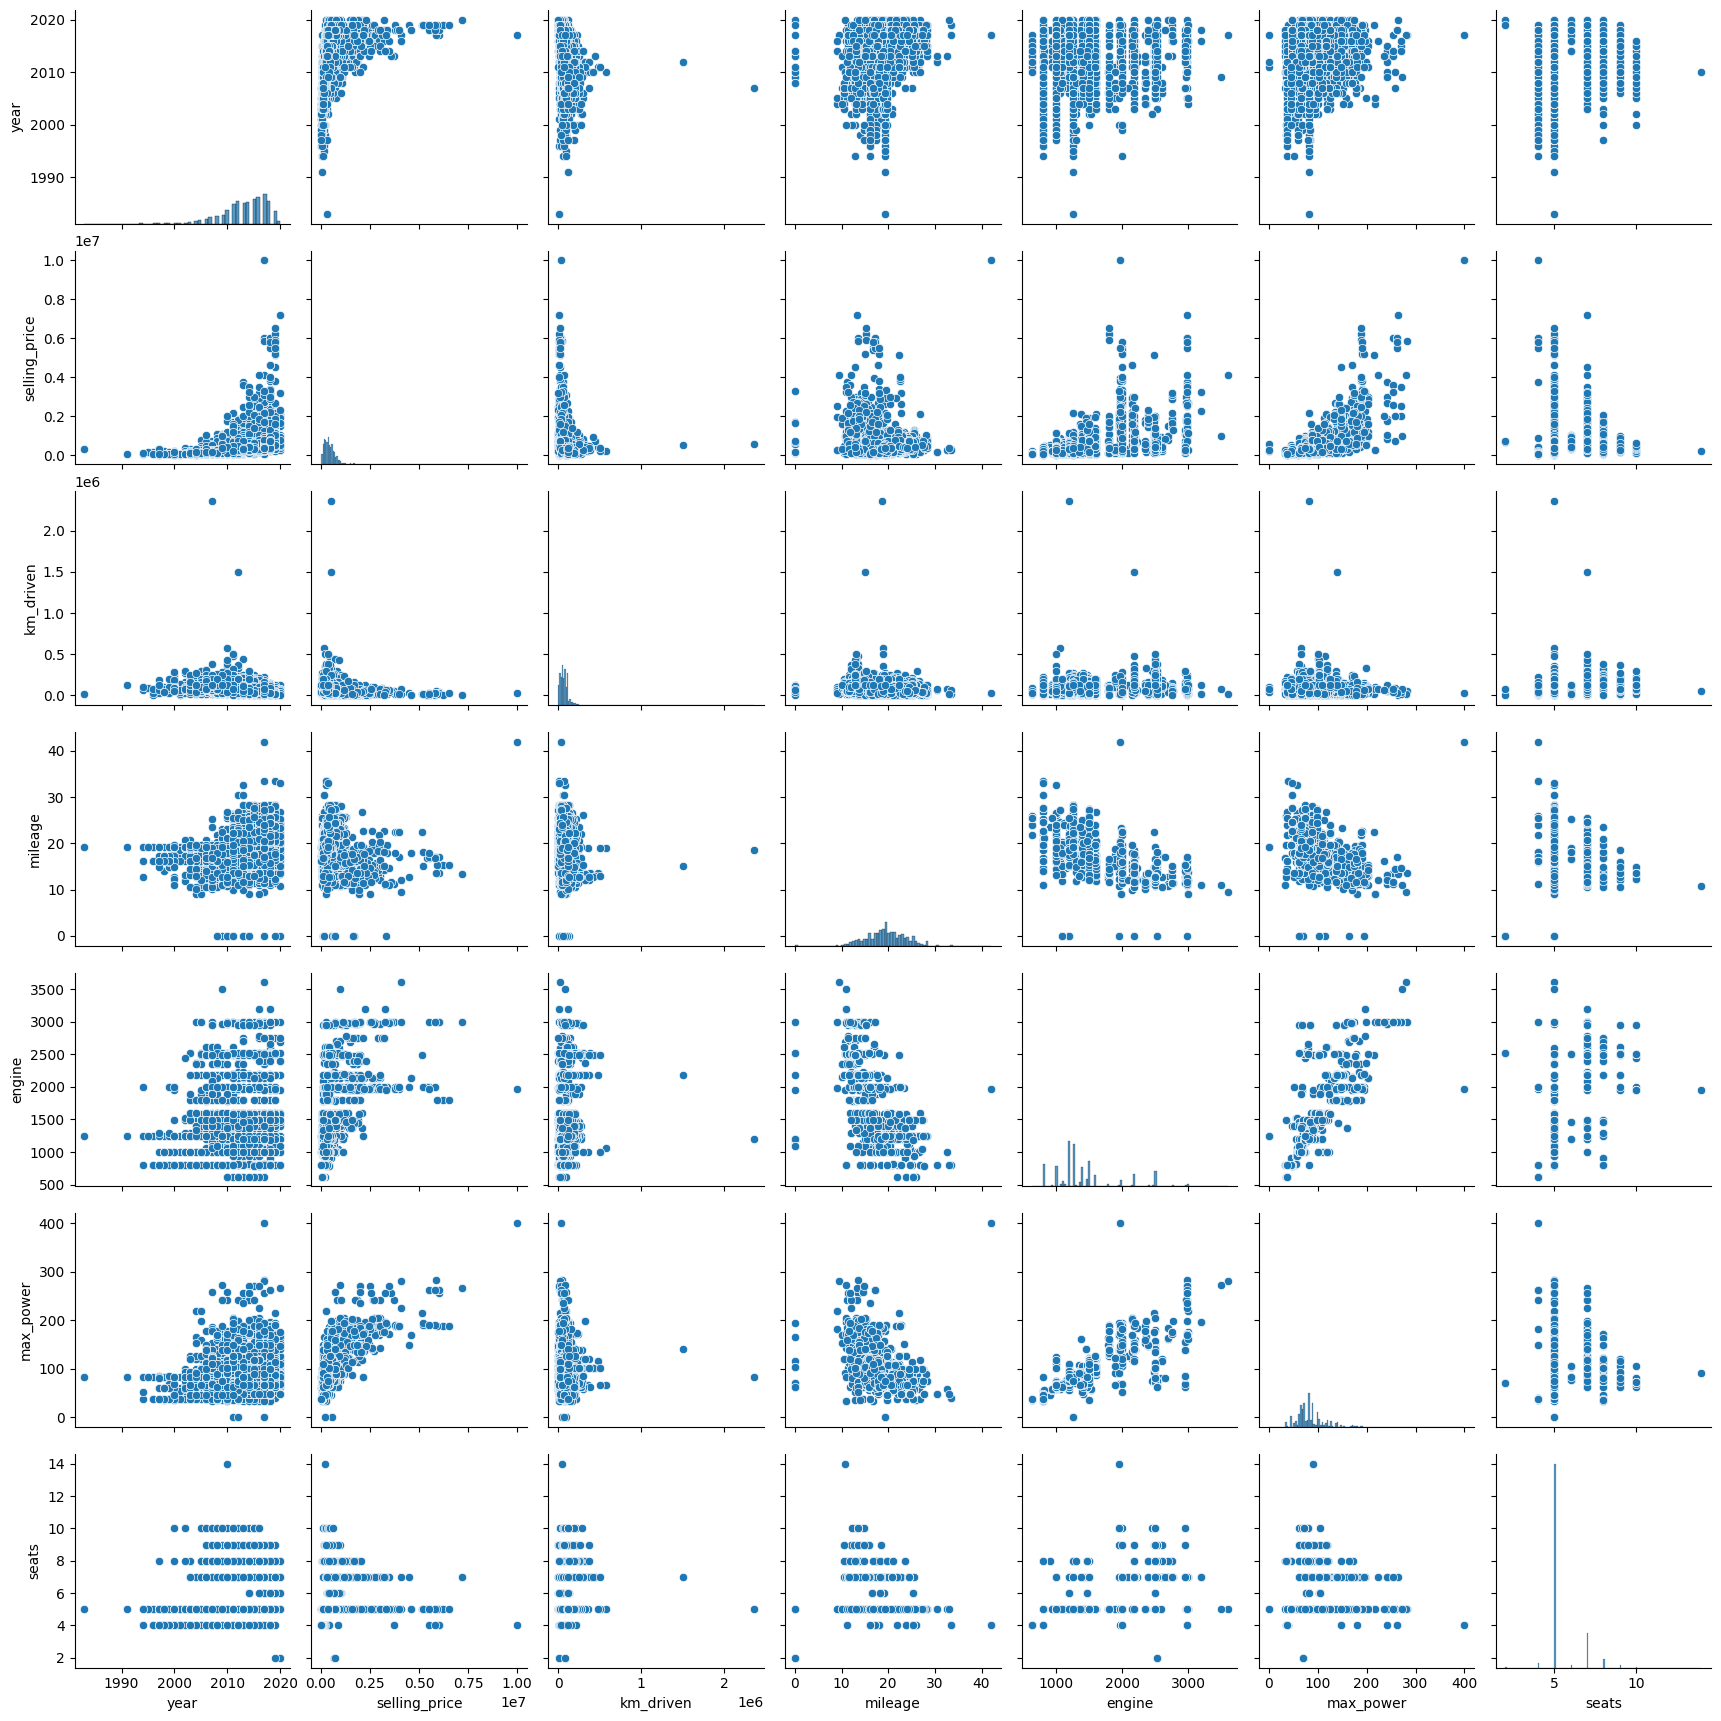

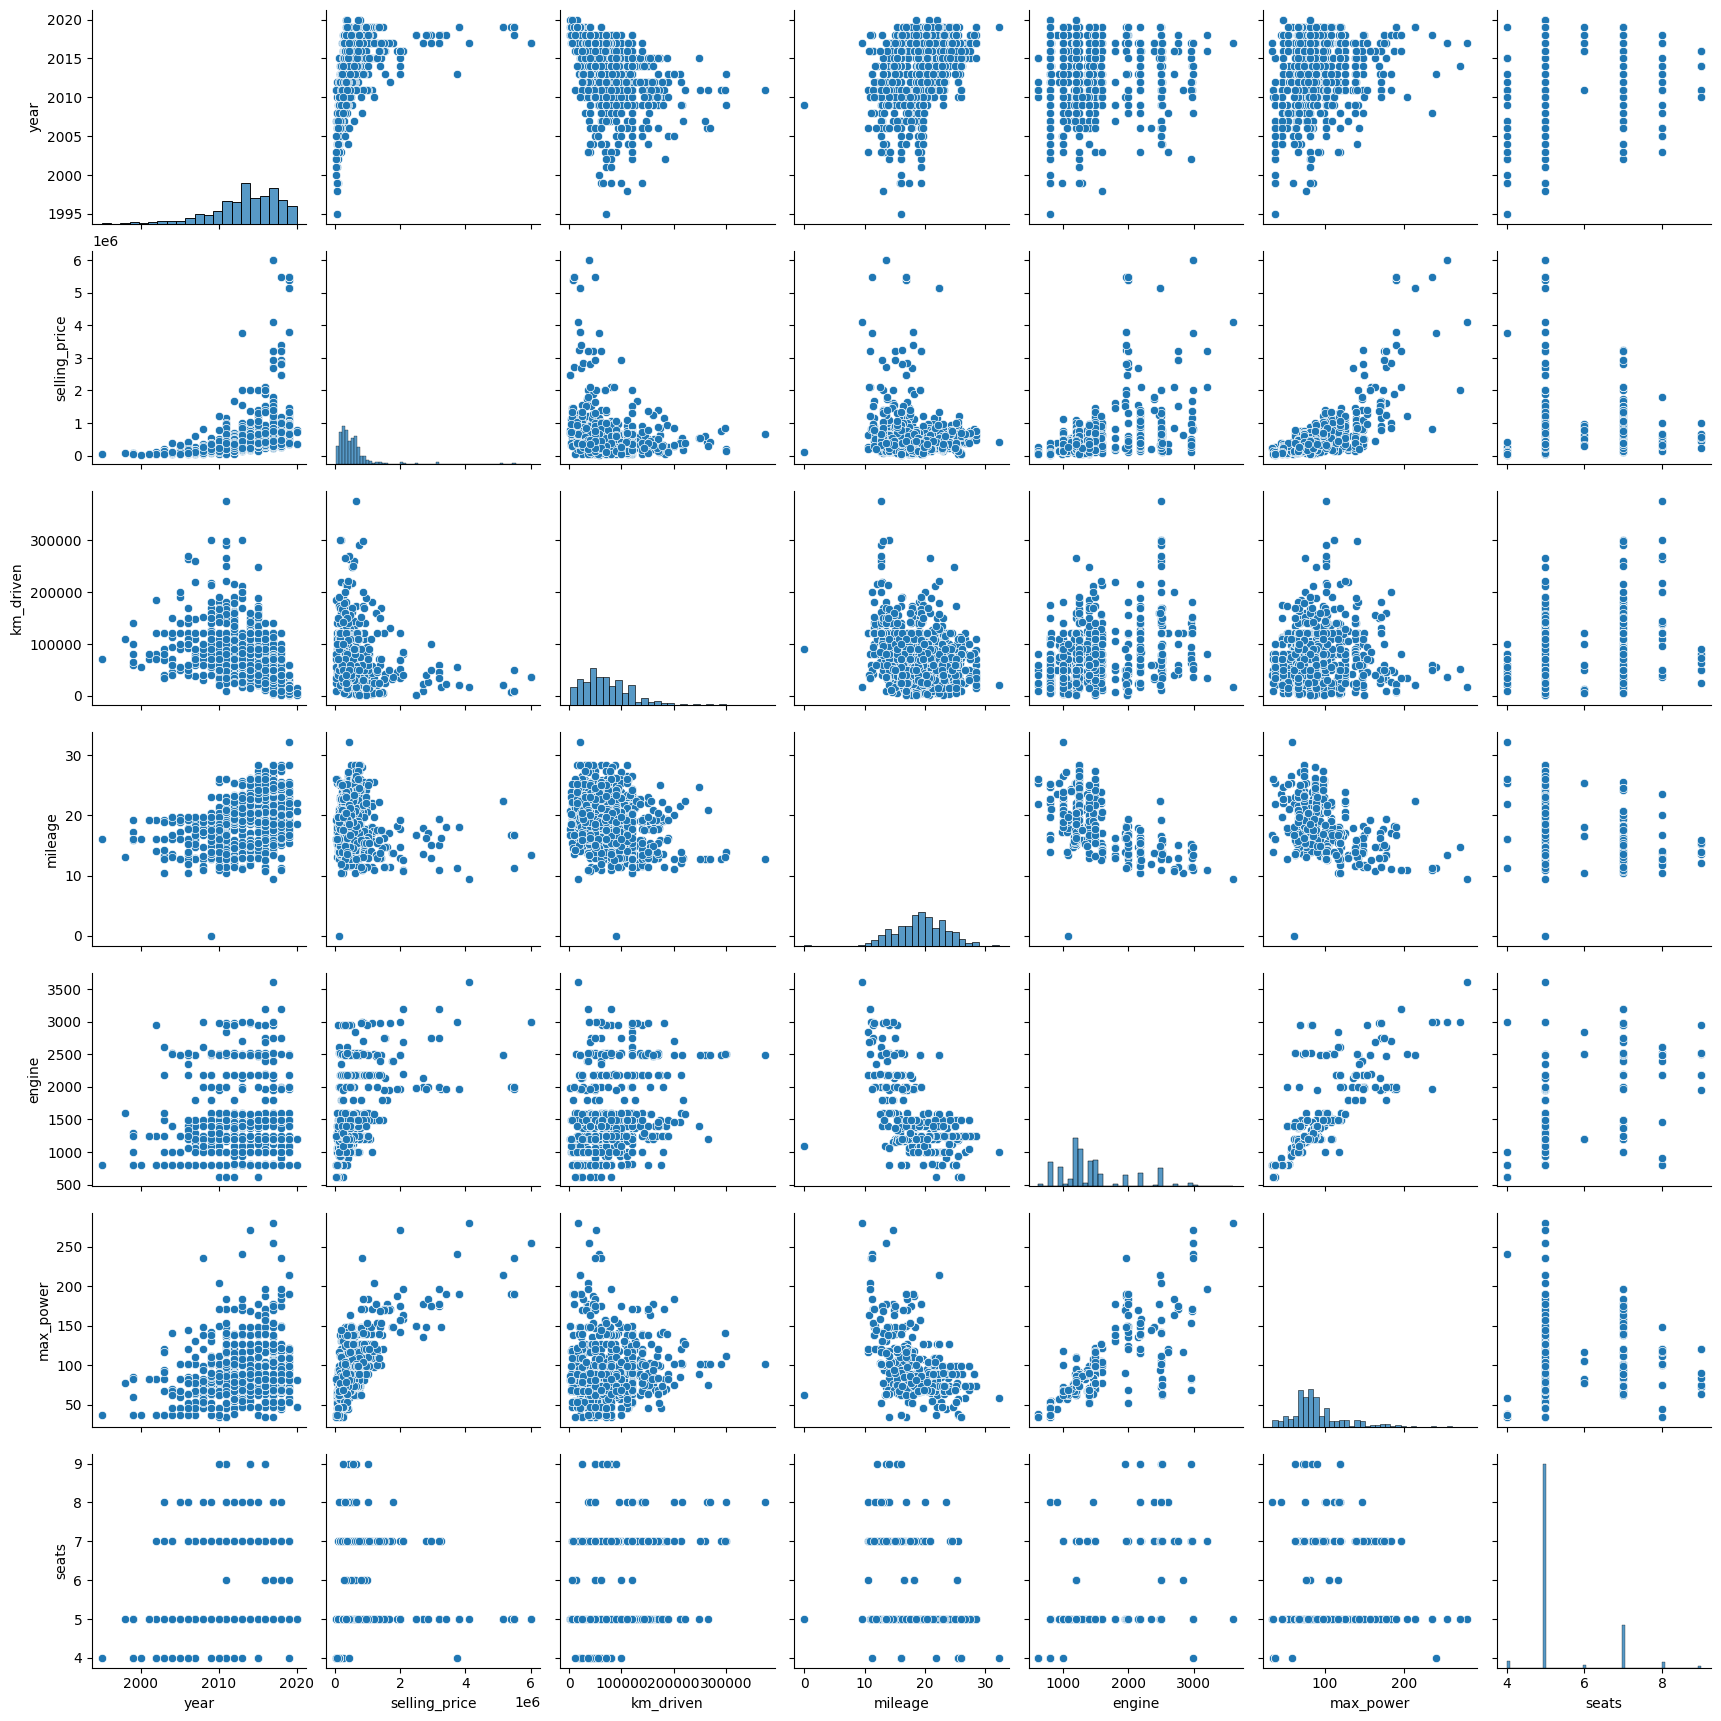

In [24]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df_train)
print("Зависимость с целевой перменной есть: чем меньше год, тем дороже машина и чем меньше клоиметров пройдено, тем дороже машина")
print("Конечно, можно говорить о коррелция, например, чем слабее двигатель, тем большое на нем проехали километров") 
sns.pairplot(df_test)
print("Да, я связь между признаками в сетах оказалась одна и таже ")

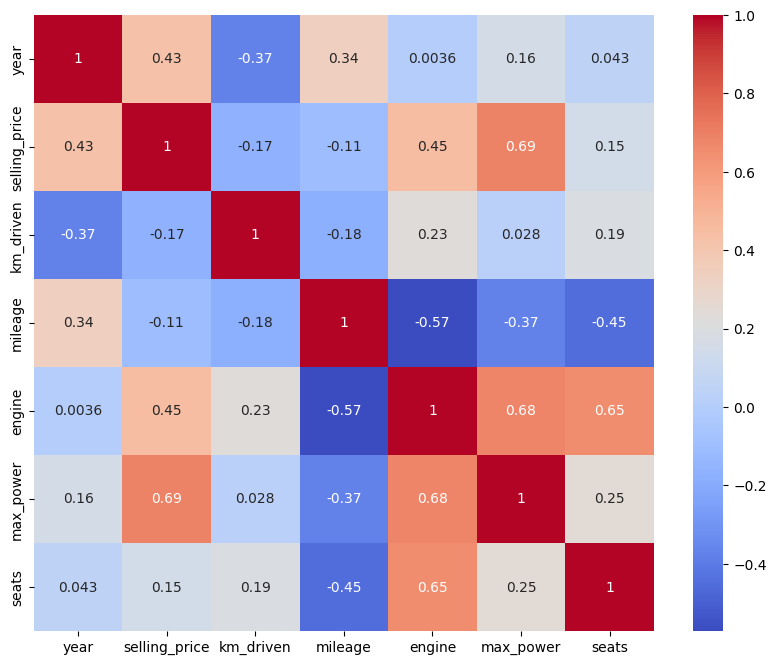

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()

Меньше всего скоррелированы km_dirven и max_power
Большая положительная линейная зависимость у sellin_price и  max_power
Да, чем меньше километров проехало, тем моложе машина, так как отрицательная линейная зависимость (-0.37)

In [26]:
X_train_real = df_train.select_dtypes(include=['int64', 'float64']).copy()
X_test_real = df_test.select_dtypes(include=['int64', 'float64']).copy()

y_train = X_train_real['selling_price']
X_train = X_train_real.drop('selling_price', axis=1)

y_test = X_test_real['selling_price'] 
X_test = X_test_real.drop('selling_price', axis=1)

In [27]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = MSE(y_train, y_train_pred)
test_rmse = MSE(y_test, y_test_pred)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train R2: 0.5900043229077672
Test R2: 0.5940435617434401
Train RMSE: 116824396648.11635
Test RMSE: 233355353055.1457


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
lr_scaler = LinearRegression()
lr_scaler.fit(X_train_scaler, y_train)

y_train_preds = lr_scaler.predict(X_train_scaler)
y_test_preds = lr_scaler.predict(X_test_scaler)

train_r2 = r2_score(y_train, y_train_preds)
test_r2 = r2_score(y_test, y_test_preds)
train_rmse = MSE(y_train, y_train_preds)
test_rmse = MSE(y_test, y_test_preds)

print(f"Train R2: {train_r2}")
print(f"Test R2: {test_r2}")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train R2: 0.5900043229077672
Test R2: 0.5940435617434514
Train RMSE: 116824396648.11635
Test RMSE: 233355353055.13913


In [29]:
import numpy as np
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lr_scaler.coef_,
    'abs_coefficient': np.abs(lr_scaler.coef_)
}).sort_values('abs_coefficient', ascending=False)

most_important_feature = feature_importance.iloc[0]['feature']
most_important_coef = feature_importance.iloc[0]['coefficient']

print(f"\nСамый информативный признак: '{most_important_feature}'")
print(f"Коэффициент: {most_important_coef}")


Самый информативный признак: 'max_power'
Коэффициент: 321439.91974347795


In [30]:

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaler, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaler)
y_test_pred_lasso = lasso.predict(X_test_scaler)

train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Train R²: {train_r2_lasso}")
print(f"Test R²: {test_r2_lasso}")
lasso_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': lasso.coef_
}).sort_values('coefficient', key=abs, ascending=False)
print(lasso_coef)
zero_coef_count = (lasso.coef_ == 0).sum()
total_coef_count = len(lasso.coef_)

print(f"Занулено коэффициентов: {zero_coef_count} из {total_coef_count}")
print(f"Процент зануленных признаков: {zero_coef_count/total_coef_count*100}%")

if zero_coef_count > 0:
    zero_features = lasso_coef[lasso_coef['coefficient'] == 0]['feature'].tolist()
    print(f"Зануленные признаки: {zero_features}")

Train R²: 0.5900043228722545
Test R²: 0.594042377372803
     feature    coefficient
4  max_power  321440.805253
0       year  152083.462671
3     engine   59712.657246
1  km_driven  -45186.988906
2    mileage   27202.563966
5      seats  -22751.371054
Занулено коэффициентов: 0 из 6
Процент зануленных признаков: 0.0%


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_lasso = GridSearchCV(
    estimator=Lasso(random_state=42),
    param_grid=param_grid_lasso,
    cv=10, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_lasso.fit(X_train_scaler, y_train)

n_params = len(param_grid_lasso['alpha']) * len(param_grid_lasso['max_iter']) * len(param_grid_lasso['tol'])
n_models = n_params * 10 
print(f"Анализ Lasso")
print(f"Количество обученных моделей: {n_models}")

best_params_lasso = grid_lasso.best_params_
print(f"Лучшие параметры модели:")
for param, value in best_params_lasso.items():
    print(f"   {param}: {value}")

best_lasso = grid_lasso.best_estimator_
y_pred_train_best = best_lasso.predict(X_train_scaler)
y_pred_test_best = best_lasso.predict(X_test_scaler)

train_r2_best = r2_score(y_train, y_pred_train_best)
test_r2_best = r2_score(y_test, y_pred_test_best)

print(f"Качество лучшей модели:")
print(f"Train R²: {train_r2_best}")
print(f"Test R²: {test_r2_best}")

print(f"Анализ коэффициентов Lasso:")
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
}).sort_values('coefficient', key=abs, ascending=False)

zero_coef_count = (best_lasso.coef_ == 0).sum()
total_coef_count = len(best_lasso.coef_)

print(f"Занулено коэффициентов: {zero_coef_count} из {total_coef_count}")
print(f"Процент зануленных признаков: {zero_coef_count/total_coef_count*100}%")

if zero_coef_count > 0:
    zero_features = coef_df[coef_df['coefficient'] == 0]['feature'].tolist()
    print(f"Зануленные признаки: {zero_features}")
else:
    print(f"Ни один признак не был занулен")

print(f"Топ-5 самых важных признаков:")
for i in range(min(5, len(coef_df))):
    feature = coef_df.iloc[i]['feature']
    coef = coef_df.iloc[i]['coefficient']
    print(f"   {i+1}. {feature}: {coef}")


param_grid_elastic = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],  
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],  
    'max_iter': [1000, 5000],
    'tol': [1e-4, 1e-3]
}


grid_elastic = GridSearchCV(
    estimator=ElasticNet(random_state=42),
    param_grid=param_grid_elastic,
    cv=10, 
    scoring='r2',  
    n_jobs=-1, 
    verbose=1
)
print(f"Анализ ElasticNet:")
grid_elastic.fit(X_train_scaler, y_train)

n_alpha = len(param_grid_elastic['alpha'])
n_l1_ratio = len(param_grid_elastic['l1_ratio'])
n_max_iter = len(param_grid_elastic['max_iter'])
n_tol = len(param_grid_elastic['tol'])
n_params_elastic = n_alpha * n_l1_ratio * n_max_iter * n_tol
n_models_elastic = n_params_elastic * 10 

print(f"Количество обученных моделей: {n_models_elastic}")
print(f"Параметров: {n_alpha}×{n_l1_ratio}×{n_max_iter}×{n_tol} = {n_params_elastic} × 10 фолдов = {n_models_elastic})")

best_params_elastic = grid_elastic.best_params_
print(f"Лучшие параметры модели:")
for param, value in best_params_elastic.items():
    print(f"   {param}: {value}")

# Интерпретация l1_ratio
l1_ratio_value = best_params_elastic['l1_ratio']
if l1_ratio_value == 1.0:
    print(f"l1_ratio = 1.0 → модель эквивалентна Lasso")
elif l1_ratio_value == 0:
    print(f"l1_ratio = 0 → модель эквивалентна Ridge")
else:
    print(f"l1_ratio = {l1_ratio_value} → смесь L1 и L2 регуляризаций")

best_elastic = grid_elastic.best_estimator_
y_pred_train_elastic = best_elastic.predict(X_train_scaler)
y_pred_test_elastic = best_elastic.predict(X_test_scaler)

train_r2_elastic = r2_score(y_train, y_pred_train_elastic)
test_r2_elastic = r2_score(y_test, y_pred_test_elastic)

print(f"Train R²: {train_r2_elastic}")
print(f"Test R²: {test_r2_elastic}")

print(f"СРАВНЕНИЕ МОДЕЛЕЙ:")
print(f"Lasso (по умолчанию): Test R² = {test_r2_lasso}")
print(f"Lasso (оптимизированная): Test R² = {test_r2_best}")
print(f"ElasticNet (оптимизированная): Test R² = {test_r2_elastic}")

print(f"Анализ коэффициентов ElasticNet:")
coef_elastic_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_elastic.coef_
}).sort_values('coefficient', key=abs, ascending=False)

zero_coef_elastic = (best_elastic.coef_ == 0).sum()
print(f"Занулено коэффициентов: {zero_coef_elastic} из {len(best_elastic.coef_)}")

print(f"Топ-5 самых важных признаков (ElasticNet):")
for i in range(min(5, len(coef_elastic_df))):
    feature = coef_elastic_df.iloc[i]['feature']
    coef = coef_elastic_df.iloc[i]['coefficient']
    print(f"   {i+1}. {feature}: {coef}")

Fitting 10 folds for each of 63 candidates, totalling 630 fits
Анализ Lasso
Количество обученных моделей: 630
Лучшие параметры модели:
   alpha: 1000
   max_iter: 1000
   tol: 0.0001
Качество лучшей модели:
Train R²: 0.5899697787324722
Test R²: 0.5928457243667833
Анализ коэффициентов Lasso:
Занулено коэффициентов: 0 из 6
Процент зануленных признаков: 0.0%
Ни один признак не был занулен
Топ-5 самых важных признаков:
   1. max_power: 322299.7922576252
   2. year: 151868.87947879685
   3. engine: 54978.18489773201
   4. km_driven: -44073.318616662
   5. mileage: 25391.785640638947
Анализ ElasticNet:
Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Количество обученных моделей: 1440
Параметров: 6×6×2×2 = 144 × 10 фолдов = 1440)
Лучшие параметры модели:
   alpha: 1
   l1_ratio: 0.9
   max_iter: 1000
   tol: 0.001
l1_ratio = 0.9 → смесь L1 и L2 регуляризаций
Train R²: 0.5861047383686784
Test R²: 0.572010646851845
СРАВНЕНИЕ МОДЕЛЕЙ:
Lasso (по умолчанию): Test R² = 0.5940423773

In [32]:
df_train_hot=df_train.copy()
df_test_hot=df_test.copy()

df_train_hot['brand'] = df_train['name'].apply(lambda x: str(x).split()[0].lower() if pd.notna(x) else 'unknown')
df_test_hot['brand'] = df_test['name'].apply(lambda x: str(x).split()[0].lower() if pd.notna(x) else 'unknown')

X_train_hot = X_train.select_dtypes(include=['int64', 'float64']).copy()
X_test_hot = X_test.select_dtypes(include=['int64', 'float64']).copy()

X_train_hot['brand'] = df_train_hot['brand']
X_test_hot['brand'] = df_test_hot['brand']

X_train_hot = pd.get_dummies(X_train_hot, columns=['brand'], prefix='brand')
X_test_hot = pd.get_dummies(X_test_hot, columns=['brand'], prefix='brand')


In [33]:
df_train_hot2=df_train
df_test_hot2=df_test

df_train_hot2['brand'] = df_train['name'].apply(lambda x: str(x).split()[0].lower() if pd.notna(x) else 'unknown')
df_test_hot2['brand'] = df_test['name'].apply(lambda x: str(x).split()[0].lower() if pd.notna(x) else 'unknown')

df_train_hot2=df_train_hot2.drop(['selling_price','name'], axis=1)
df_test_hot2=df_test_hot2.drop(['selling_price','name'], axis=1)

cat_cols = df_train_hot2.select_dtypes(include=['object']).columns.tolist()

X_train_cat2 = pd.get_dummies(df_train_hot2, columns=cat_cols, prefix=cat_cols,drop_first=True)
X_test_cat2 = pd.get_dummies(df_test_hot2, columns=cat_cols, prefix=cat_cols,drop_first=True)
print(X_test_cat2)



     year  km_driven  mileage  engine  max_power  seats  fuel_Diesel  \
0    2010     168000    14.00  2498.0     112.00    7.0         True   
1    2017      25000    21.50  1497.0     108.50    5.0         True   
2    2007     218463    12.90  1799.0     130.00    5.0        False   
3    2015     173000    25.10  1498.0      98.60    5.0         True   
4    2011      70000    16.50  1172.0      65.00    5.0        False   
..    ...        ...      ...     ...        ...    ...          ...   
995  2008     100000    19.81  1086.0      68.05    5.0        False   
996  2017      50000    18.60  1197.0      81.83    5.0        False   
997  2009      40000    23.00  1396.0      90.00    5.0         True   
998  2012      25000    20.36  1197.0      78.90    5.0        False   
999  2016     110000    26.00  1498.0      98.60    5.0         True   

     fuel_LPG  fuel_Petrol  seller_type_Individual  ...  brand_mercedes-benz  \
0       False        False                    True  ...

In [34]:
from sklearn.linear_model import Ridge
param_grid_Ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2]
}

grid_Ridge = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=param_grid_Ridge,
    cv=10, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_Ridge.fit(X_train_scaler, y_train)

n_params = len(param_grid_Ridge['alpha']) * len(param_grid_Ridge['max_iter']) * len(param_grid_Ridge['tol'])
n_models = n_params * 10 
print(f"Количество обученных моделей: {n_models}")

best_params_Ridge = grid_Ridge.best_params_
print(f"Лучшие параметры модели:")
for param, value in best_params_Ridge.items():
    print(f"   {param}: {value}")

best_Ridge = grid_Ridge.best_estimator_
y_pred_train_best = best_Ridge.predict(X_train_scaler)
y_pred_test_best = best_Ridge.predict(X_test_scaler)

train_r2_best = r2_score(y_train, y_pred_train_best)
test_r2_best = r2_score(y_test, y_pred_test_best)

print(f"Качество лучшей модели:")
print(f"Train R²: {train_r2_best}")
print(f"Test R²: {test_r2_best}")

print(f"Анализ коэффициентов Ridge:")
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_Ridge.coef_
}).sort_values('coefficient', key=abs, ascending=False)

zero_coef_count = (best_Ridge.coef_ == 0).sum()
total_coef_count = len(best_Ridge.coef_)

print(f"Занулено коэффициентов: {zero_coef_count} из {total_coef_count}")
print(f"Процент зануленных признаков: {zero_coef_count/total_coef_count*100}%")

if zero_coef_count > 0:
    zero_features = coef_df[coef_df['coefficient'] == 0]['feature'].tolist()
    print(f"Зануленные признаки: {zero_features}")
else:
    print(f"Ни один признак не был занулен")

print(f"Топ-5 самых важных признаков:")
for i in range(min(5, len(coef_df))):
    feature = coef_df.iloc[i]['feature']
    coef = coef_df.iloc[i]['coefficient']
    print(f"   {i+1}. {feature}: {coef}")

Fitting 10 folds for each of 63 candidates, totalling 630 fits
Количество обученных моделей: 630
Лучшие параметры модели:
   alpha: 1000
   max_iter: 1000
   tol: 0.0001
Качество лучшей модели:
Train R²: 0.5808798814067296
Test R²: 0.5578063417986046
Анализ коэффициентов Ridge:
Занулено коэффициентов: 0 из 6
Процент зануленных признаков: 0.0%
Ни один признак не был занулен
Топ-5 самых важных признаков:
   1. max_power: 261098.29186912026
   2. year: 140410.10253581428
   3. engine: 82227.3473730634
   4. km_driven: -46970.02886682487
   5. seats: -22090.49244719318


In [35]:
def business_metric(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    diff = np.abs((y_pred - y_true) / y_true)
    diff10 = np.mean(diff <= 0.10)
    
    return diff10
print(f"Ridge:{business_metric(y_test, y_pred_test_best)}")
print(f"ElasticNet:{business_metric(y_test, y_pred_test_best)}")
print(f"Lasso:{business_metric(y_test, y_pred_test_elastic)}")
print(f"Classic:{business_metric(y_test, y_test_pred)}")


Ridge:0.246
ElasticNet:0.246
Lasso:0.24
Classic:0.223
